In [30]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
print("TensorFlow version:", tf.__version__)

seed = 123
tf.keras.utils.set_random_seed(
    seed
)

TensorFlow version: 2.13.0


In [31]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [32]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [33]:
archive

'C:\\Users\\jboak\\.keras\\datasets\\flower_photos.tgz'

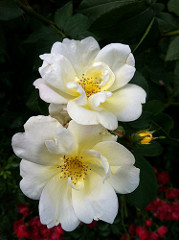

In [34]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [35]:
data_dir

WindowsPath('C:/Users/jboak/.keras/datasets/flower_photos')

In [36]:
batch_size = 32
img_height = 180
img_width = 180

In [37]:
"""
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=None)
  
"""



'\ntrain_ds = tf.keras.utils.image_dataset_from_directory(\n  data_dir,\n  validation_split=0.2,\n  subset="training",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=None)\n  \n'

In [38]:
 
"""

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=None) 
  
"""



'\n\nval_ds = tf.keras.utils.image_dataset_from_directory(\n  data_dir,\n  validation_split=0.2,\n  subset="validation",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=None) \n  \n'

In [39]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [40]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [41]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [42]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

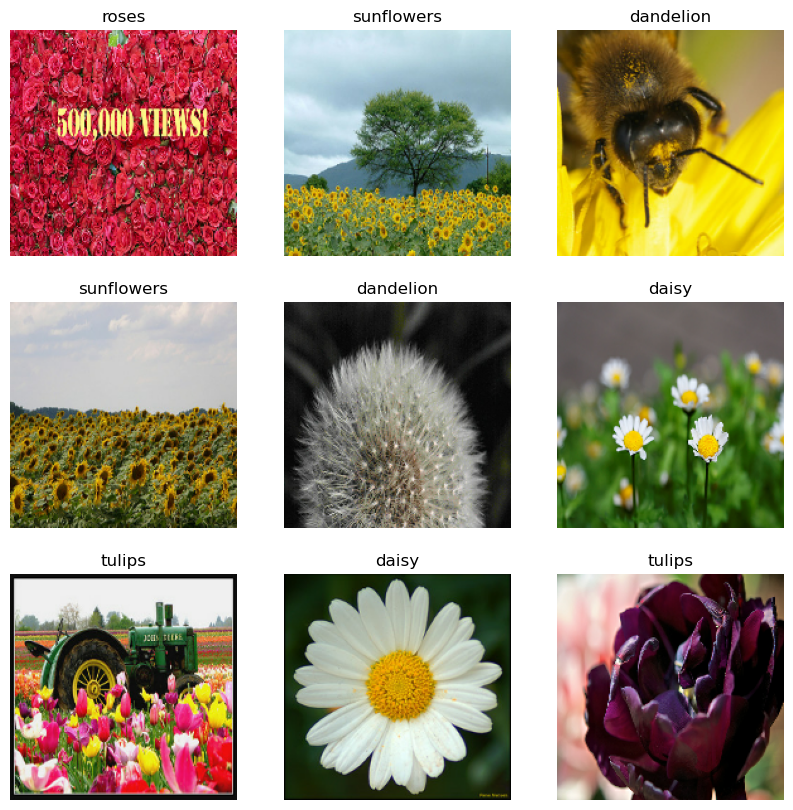

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [44]:
#Plan:
#Model 1: Follow... https://www.tensorflow.org/tutorials/load_data/images
# We may find overfitting.
#Model 2: Then use Dropout to fix the overfitting. Follow...  https://www.tensorflow.org/tutorials/quickstart/beginner


In [45]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3

In [46]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [47]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [48]:
model.fit(train_ds, epochs=3)

Epoch 1/3
92/92 [==============================] - 61s 630ms/step - loss: 1.2632 - accuracy: 0.4601
Epoch 2/3
92/92 [==============================] - 60s 646ms/step - loss: 0.9985 - accuracy: 0.6080
Epoch 3/3
92/92 [==============================] - 60s 647ms/step - loss: 0.8124 - accuracy: 0.6918


In [49]:
model.evaluate(val_ds, verbose=2)

23/23 - 5s - loss: 0.8615 - accuracy: 0.6635 - 5s/epoch - 220ms/step


[0.8614500164985657, 0.6634877324104309]

In [50]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 63s 684ms/step - loss: 0.6329 - accuracy: 0.7704 - val_loss: 0.9300 - val_accuracy: 0.6540
Epoch 2/3
92/92 [==============================] - 68s 734ms/step - loss: 0.4729 - accuracy: 0.8287 - val_loss: 0.9485 - val_accuracy: 0.6717
Epoch 3/3
92/92 [==============================] - 67s 719ms/step - loss: 0.3077 - accuracy: 0.8944 - val_loss: 1.1757 - val_accuracy: 0.6594


In [51]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes)
])

model2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [52]:
model2.fit(train_ds, epochs=3)

Epoch 1/3
92/92 [==============================] - 14s 129ms/step - loss: 7.7688 - accuracy: 0.2367
Epoch 2/3
92/92 [==============================] - 12s 128ms/step - loss: 1.5804 - accuracy: 0.2725
Epoch 3/3
92/92 [==============================] - 13s 132ms/step - loss: 1.5808 - accuracy: 0.2616


In [53]:
model2.evaluate(val_ds, verbose=2)

23/23 - 1s - loss: 1.6041 - accuracy: 0.2398 - 1s/epoch - 64ms/step


[1.604082703590393, 0.23978202044963837]

In [54]:
model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 14s 144ms/step - loss: 1.5979 - accuracy: 0.2510 - val_loss: 1.5855 - val_accuracy: 0.2643
Epoch 2/3
92/92 [==============================] - 13s 133ms/step - loss: 1.5846 - accuracy: 0.2602 - val_loss: 1.6020 - val_accuracy: 0.2398
Epoch 3/3
92/92 [==============================] - 14s 153ms/step - loss: 1.5951 - accuracy: 0.2510 - val_loss: 1.5944 - val_accuracy: 0.2520


In [55]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes)
])

model3.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [56]:
model3.fit(train_ds, epochs=3)

Epoch 1/3
92/92 [==============================] - 84s 881ms/step - loss: 1.3924 - accuracy: 0.3798
Epoch 2/3
92/92 [==============================] - 35s 383ms/step - loss: 1.1044 - accuracy: 0.5341
Epoch 3/3
92/92 [==============================] - 29s 316ms/step - loss: 0.9472 - accuracy: 0.6311


In [57]:
model3.evaluate(val_ds, verbose=2)

23/23 - 2s - loss: 0.9177 - accuracy: 0.6199 - 2s/epoch - 93ms/step


[0.917726457118988, 0.6198909878730774]

In [58]:
model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 31s 333ms/step - loss: 0.8028 - accuracy: 0.6901 - val_loss: 0.8467 - val_accuracy: 0.6730
Epoch 2/3
92/92 [==============================] - 32s 344ms/step - loss: 0.6712 - accuracy: 0.7480 - val_loss: 0.8320 - val_accuracy: 0.6907
Epoch 3/3
92/92 [==============================] - 34s 364ms/step - loss: 0.5353 - accuracy: 0.8052 - val_loss: 0.9740 - val_accuracy: 0.6308
